#  Curso de Introducción a la Inteligencia Artificial y los algoritmos


---


*Red neuronal con Python*

Utilizamos Google colab, un entorno de desarrollo desarrollado por Google. Creamos una libreta con extensión .ipynb.  Un archivo IPYNB es un documento de cuaderno utilizado por Jupyter Notebook, un entorno computacional interactivo diseñado para ayudar a los científicos a trabajar con el lenguaje Python y sus datos

Esta es una sencilla red neuronal. En muchos países se mide la temperatura en grados Celsius. Hay otros países que utilizan los grados Fahrenheit.
La fórmula que los relaciona es :  F = C * 1,8 + 32 o bien C = (F - 32)* 5/9.

Por tanto, se trata de una fórmula lineal donde tenemos un valor de X que es los grados Celsius, un valor de Y que son los grados fahrenheit, una constante que es 1,8 y un término independiente, 32.

Es muy importante conocer los valores los conceptos de PESOS y SESGOS, que utiliza la red para ir ajustando el modelo.

In [4]:
# Importamos a nuestra libreta de trabajo las librerias a utilizar
import tensorflow as tf # libreria para IA desarrollada por google
import numpy as np # para trabajar con números

In [5]:
#introducimos los datos. Se crea un array, un tipo de dato estructurado que permite almacenar un conjunto de datos homogéneo
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float) #float son números reales con comas, coma flotante
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float) #np es numpy python, números en python

#estos son los ejemplos que la red usará para aprender. De momento no sabemos cual es la fórmula
print(celsius)
print(fahrenheit)

[-40. -10.   0.   8.  15.  22.  38.]
[-40.  14.  32.  46.  59.  72. 100.]


In [8]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [9]:
# Modelo de red neuronal con una neurona. Utilizamos el framework Keras. Keras nos permite hacer las redes  neuronales más simples. Puedes especificar las dos capas de entrada
# y salida o especificar solo la capa de salida.
capa = tf.keras.layers.Dense(units=1, input_shape=[1]) # capas tipo densa, conecta todas las neuronas entre si aunque en este caso solo hay dos neuronas, units=unidades o neuronas
#input_shape estamos diciendo que se trata de una capa de entrada con una neurona
print(capa)

#Modelo secuencial
modelo = tf.keras.Sequential([capa]) # creamos un modelo secuencial, aunque hay de varios tipos. Le indicamos la capa que acabamos de crear
print(modelo)

<Dense name=dense_1, built=False>
<Sequential name=sequential_1, built=True>


In [10]:
# COMPILAMOS EL MODELO. Se prepara el modelo para ser entrenado. Se utilizan dos propiedades: optimizador y función de pérdida.
# Optimizador utilizamos el algoritmo de Adams, puedes ver que es en una búsqueda , permite a la red saber como ajustar PESOS y SESGOS para ir mejorando
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), # "0.1" es la tasa de aprendizaje, si es muy pequeño los ajusta poco a poco, si es muy grande puede tardar mucho
    loss='mean_squared_error' # es la función de pérdida, que utilizamos el error cuadrático medio
)

In [11]:
# ENTRENAMIENTO DEL MODELO. Se utiliza la función fit, ajuste,
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False) #epochs es las vueltas que da el algoritmo, recordamos que tenemos 7 datos, 1 vuelta serían usarlos una vez
print("Modelo entrenado!")

#tenemos que dar muchas vueltas para que optimice lo más posible, se usa el valor 1000 para revisar, aunque se puede cambiar posteriormente


Comenzando entrenamiento...
Modelo entrenado!


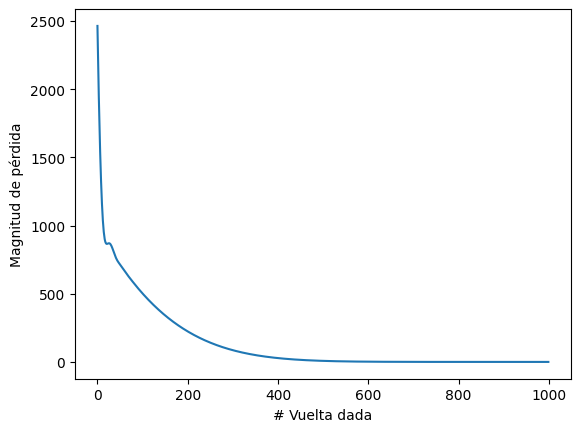

In [19]:
# RESULTADO DE LA FUNCIÓN DE PÉRDIDA. Nos informa como de mal están los resultados en cada vuelta
import matplotlib.pyplot as plt # se importa la libreria matplot para hacer las gráficas
plt.xlabel("# Vuelta dada")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])


Como dimos mil vueltas esas mil vueltas podemos ver que conforme fue haciendo más vueltas cada vez los errores van disminuyendo en realidad por lo que podemos ver no necesitamos mil vueltas a partir de 500

In [21]:
# PREDICCIÓN DEL MODELO
print("Hagamos una predicción!")
import numpy as np
resultado = modelo.predict(np.array([100.0]))
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
El resultado es [[211.74347]] fahrenheit!


In [22]:
# MOSTRANDO LAS VARIABLES INTERNAS DEL MODELO, DE NUESTRA RED NEURONAL

print("Variables internas del modelo")
print(capa.get_weights()) # En el primer array el valor es de 1.7984154 (la fórmula es 1,8), sería el PESO y el segundo array es 31.89878 (el SESGO), buscábamos 32

Variables internas del modelo
[array([[1.7981764]], dtype=float32), array([31.925823], dtype=float32)]


Por tanto, hemos introduccido 100, que es multiplicado por 1.7984154 y después se le suma 31.89878, es decir 100*1,7984154+31.89878 = **211.74**.
# Entrada ha sido 100 y salida ha sido 211.74.
La red neuronal sin haberle dicho la fórmula ha conseguido un resultado prácticamente igual al de la fórmula original.

In [23]:
# Agregamos más capas y más neuronas a la red. Agregamos 2 capas intermedias (ocultas) con 3 neuronas y hacemos el mismo proceso
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

c:\Users\Luis Lopez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [25]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


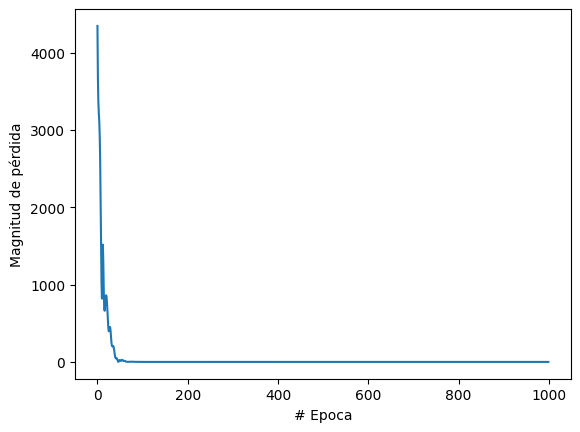

In [26]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [28]:
print("Hagamos una predicción!")
resultado = modelo.predict(np.array([100.0]))
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
El resultado es [[211.74742]] fahrenheit!


In [29]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.24220093, -0.1530794 , -0.6033125 ]], dtype=float32), array([ 4.366747 , -3.5003355, -4.468313 ], dtype=float32)]
[array([[ 0.15010561, -0.32631025,  1.1537346 ],
       [ 0.47394025, -0.33471647, -0.80615205],
       [ 0.8096344 , -0.5941234 , -1.2250876 ]], dtype=float32), array([-4.4019237,  3.4072814,  3.8376145], dtype=float32)]
[array([[-0.62212145],
       [ 0.3605241 ],
       [ 1.1842376 ]], dtype=float32), array([3.9096723], dtype=float32)]
